# **GROUP MEMBERS**:-
* 1. Dixit Dutt Bohra: PRN- (220340128010)
* 2. Lalit Bhaskar Mahale: PRN- (220340128021)
* 3. Manchikatla Raman Kumar: PRN- (220340128023)
* 4. Prashant Shukla: PRN- (220340128036)
* 5. Vipin Kumar Tripathi: PRN- (220340128054)

#***Installing kaggle API to download required data***

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!kaggle competitions download -c new-york-city-taxi-fare-prediction

!unzip -q "/content/new-york-city-taxi-fare-prediction.zip"

 99% 1.55G/1.56G [00:33<00:00, 51.1MB/s]
100% 1.56G/1.56G [00:33<00:00, 50.6MB/s]


# ***Installing required dependencies***

In [ ]:
import pandas as pd
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import xgboost as xgb
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv("train.csv")
#df.head()

# ***Feather Format***
* The primary reason for the existence of Feather is to have a data format using which data frames can be exchanged between Python and R.
* Feather is a binary data format.
* Using feather enables faster I/O speeds and less memory. However, since it is an evolving format it is recommended to use it for quick loading and transformation related data processing rather than using it as a long term storage.


In [ ]:
train= df.to_feather("/content/train.ftr")

In [ ]:
df1 = pd.read_feather('/content/train.ftr')
df1.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [ ]:
train_df=df1.copy()

In [ ]:
train_df.shape

(55423856, 8)

In [ ]:
test_df = pd.read_csv('/content/test.csv')

In [ ]:
test_df.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973,40.764,-73.981,40.744,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.987,40.719,-73.999,40.739,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.983,40.751,-73.980,40.746,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981,40.768,-73.990,40.752,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966,40.790,-73.989,40.744,1


##***Dropping unrequired feature for training***

In [ ]:
train_df.drop('key', axis=1, inplace=True)

In [ ]:
train_df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.500,2009-06-15 17:26:21 UTC,-73.844,40.721,-73.842,40.712,1
1,16.900,2010-01-05 16:52:16 UTC,-74.016,40.711,-73.979,40.782,1
2,5.700,2011-08-18 00:35:00 UTC,-73.983,40.761,-73.991,40.751,2
3,7.700,2012-04-21 04:30:42 UTC,-73.987,40.733,-73.992,40.758,1
4,5.300,2010-03-09 07:51:00 UTC,-73.968,40.768,-73.957,40.784,1
...,...,...,...,...,...,...,...
55423851,14.000,2014-03-15 03:28:00 UTC,-74.005,40.740,-73.963,40.763,1
55423852,4.200,2009-03-24 20:46:20 UTC,-73.958,40.766,-73.952,40.774,1
55423853,14.100,2011-04-02 22:04:24 UTC,-73.971,40.752,-73.961,40.797,1
55423854,28.900,2011-10-26 05:57:51 UTC,-73.981,40.765,-73.871,40.774,1


In [ ]:
test_df

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973,40.764,-73.981,40.744,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.987,40.719,-73.999,40.739,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.983,40.751,-73.980,40.746,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981,40.768,-73.990,40.752,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966,40.790,-73.989,40.744,1
...,...,...,...,...,...,...,...
9909,2015-05-10 12:37:51.0000002,2015-05-10 12:37:51 UTC,-73.968,40.797,-73.956,40.780,6
9910,2015-01-12 17:05:51.0000001,2015-01-12 17:05:51 UTC,-73.946,40.804,-73.960,40.776,6
9911,2015-04-19 20:44:15.0000001,2015-04-19 20:44:15 UTC,-73.992,40.727,-73.790,40.647,6
9912,2015-01-31 01:05:19.0000005,2015-01-31 01:05:19 UTC,-73.986,40.735,-73.939,40.802,6


* The sample() method returns a specified number of random rows.
* The sample() method returns 1 row if a number is not specified.
* dataframe.sample(n, frac, replace, weights, random_state, axis)
* frac-->Float Number-->Optional. A fraction of rows to return, like 0.1 for 10% of the rows for our data

In [ ]:
train_df=train_df.sample(frac = 0.1)

In [ ]:
train_df.head()


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
23058087,16.900,2010-12-23 12:00:42 UTC,-73.980,40.742,-73.971,40.795,1
3425039,2.500,2014-08-27 17:55:00 UTC,-74.010,40.710,0.000,0.000,1
19880255,4.100,2012-05-20 08:42:09 UTC,-73.986,40.767,-73.983,40.762,1
13842597,8.000,2014-11-12 04:44:00 UTC,-74.010,40.719,-73.994,40.739,1
32416799,13.700,2010-02-18 08:10:00 UTC,-73.992,40.716,-73.971,40.764,1


In [ ]:
train_df.shape

(5542386, 7)

***Generate descriptive statistics***-
Descriptive statistics
include those that summarize the central tendency,
dispersion and shape of a dataset’s distribution, excluding NaN values.

In [ ]:
train_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,5542386.000,5542386.000,5542386.000,5542350.000,5542350.000,5542386.000
mean,11.340,-72.507,39.921,-72.512,39.925,1.686
std,9.829,12.672,9.041,12.417,9.495,1.335
min,-96.000,-3408.459,-3475.475,-3365.126,-3475.475,0.000
25%,6.000,-73.992,40.735,-73.991,40.734,1.000
50%,8.500,-73.982,40.753,-73.980,40.753,1.000
75%,12.500,-73.967,40.767,-73.964,40.768,2.000
max,2010.900,3457.626,3376.632,3442.185,3344.494,208.000


In [ ]:
test_df.describe()


,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000,9914.000,9914.000,9914.000,9914.000
mean,-73.975,40.751,-73.974,40.752,1.671
std,0.043,0.034,0.039,0.035,1.279
min,-74.252,40.573,-74.263,40.569,1.000
25%,-73.993,40.736,-73.991,40.735,1.000
50%,-73.982,40.753,-73.980,40.754,1.000
75%,-73.968,40.767,-73.964,40.769,2.000
max,-72.987,41.710,-72.991,41.697,6.000


##Return the dtypes in the DataFrame. This returns a Series with the data type of each column.


In [ ]:
train_df.dtypes


fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

#***Reducing size of our data for fast processing***

In [ ]:

train_df['fare_amount'] = train_df['fare_amount'].astype('float32')
 #train_df['fare_amount'] = train_df['fare_amount'].astype('float32')
 train_df['pickup_longitude'] = train_df['pickup_longitude'].astype('float32')
 train_df['pickup_latitude'] = train_df['pickup_latitude'].astype('float32')
 train_df['dropoff_longitude'] = train_df['dropoff_longitude'].astype('float32')
 #train_df['dropoff_lattitude'] = train_df['dropoff_latitude'].astype('float32')
 train_df['passenger_count'] = train_df['passenger_count'].astype('int8')



#**isna() produces Boolean Series where the number of True is the number of NaN**, 
#**and df. isna().sum() adds False and True replacing them respectively by 0 and 1** 
#**Therefore this indirectly counts the NaN , where a simple count would just return the length of the column**. 

In [ ]:
train_df.isna().sum()


fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude    36
dropoff_latitude     36
passenger_count       0
dtype: int64

In [ ]:
train_df.dtypes


fare_amount          float32
pickup_datetime       object
pickup_longitude     float32
pickup_latitude      float32
dropoff_longitude    float32
dropoff_latitude     float64
passenger_count         int8
dtype: object

###***Pandas use scientific notation to display float numbers***. 
###To disable or format scientific notation in Pandas/Python we will use option pd.set_option 


In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
train_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,5542386.000,5542386.000,5542386.000,5542350.000,5542350.000,5542386.000
mean,11.340,-72.507,39.921,-72.512,39.925,1.686
std,9.829,12.672,9.041,12.417,9.495,1.313
min,-96.000,-3408.459,-3475.475,-3365.126,-3475.475,-127.000
25%,6.000,-73.992,40.735,-73.991,40.734,1.000
50%,8.500,-73.982,40.753,-73.980,40.753,1.000
75%,12.500,-73.967,40.767,-73.964,40.768,2.000
max,2010.900,3457.626,3376.632,3442.185,3344.494,9.000


## ***DATA CLEANING***

* We can see that the minimum fare amount is negative, which can't be correct.
* The longitudes and latitudes have to be in range [-180, 180] and [-90, 90] respectively.
* The valid passanger count range is from 1 to 6, so we have to delete the values outside it's range.
* Let's see how many of the values are incorrect.

In [ ]:
(train_df['fare_amount'] < 0).sum()


215

In [ ]:
((train_df['pickup_longitude'] < -180) | (train_df['pickup_longitude'] > 180)).sum()


119

In [ ]:
((train_df['pickup_latitude'] < -90) | (train_df['pickup_latitude'] > 90)).sum()


96

* We also have to check that the passenger count is between 1 and 6


In [ ]:
((train_df['passenger_count'] == 0) | (train_df['passenger_count'] > 6)).sum()


19411

In [ ]:
(train_df['passenger_count'] > 6).sum()


5

# ***Histplot of Fare Amount vs No. of passengers***

Text(0.5, 1.0, 'Distribution of Fare Amount')

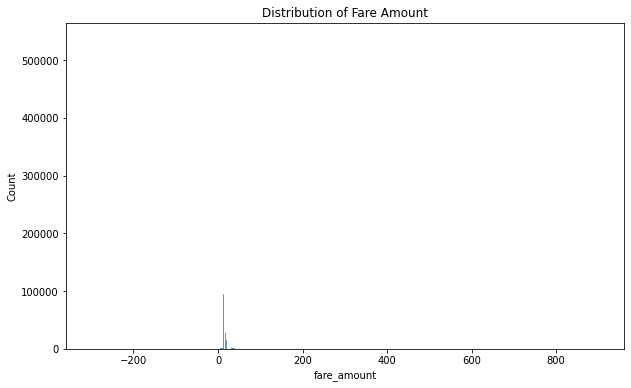

In [ ]:
plt.figure(figsize=(10, 6))
#fig, ax = plt.subplots()
#sns.histplot(train_df, ax=ax)  
#ax.set_xlim(1,200)
#ax.set_xticks(range(1,200,20))
sns.histplot(train_df['fare_amount']);
plt.title('Distribution of Fare Amount')

* As the fare amounts over 200 are extremely rare, we can drop them as outliers
* We can see that only a small amount of values are labeled incorrectly, removing them from this huge dataset should have no impact

*  Initally we started with the Dataframe cleaning method above, however adding in stricter restrictions to longitude and latitude had a significant improvement for the model
* NYC longitude and latitude are (40.7, 70), so I limited the entries to be near the NYC.

In [ ]:
def clean_df(df):
    new_df = df[
        ((df['fare_amount'] > 0) & (df['fare_amount'] <= 110)) &
        ((df['pickup_longitude'] > -75) & (df['pickup_longitude'] < -73)) &  
        ((df['pickup_latitude'] > 40) & (df['pickup_latitude'] < 42)) &
        ((df['dropoff_longitude'] > -75) & (df['dropoff_longitude'] < -73)) &
        ((df['dropoff_latitude'] > 40 & (df['dropoff_latitude'] < 42))) &
        ((df['passenger_count'] > 0) & (df['passenger_count'] <= 6))
    ]
    
    return new_df

* Here's the visualization of pickup coordinates before and after Data cleaning.
* It is visible that before cleaning, the data had lots of absurd values.
* Restricting the coordinates helps the model to learn

#***Scatter plot of locations before data cleaning***

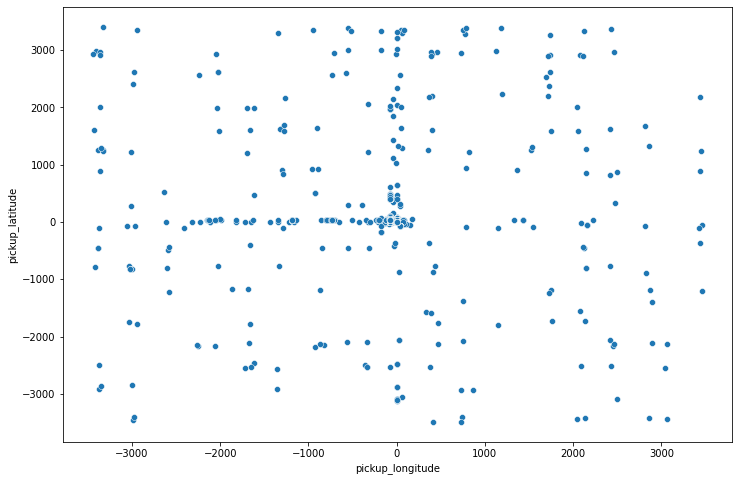

In [ ]:
plt.title("Scatter plot of locations before data cleaning:")
plt.figure(figsize=(12,8))
sns.scatterplot(x=train_df['pickup_longitude'], y=train_df['pickup_latitude'])

# ***Applying data cleaning function***

In [ ]:
print("Before:", len(train_df))
train_df = clean_df(train_df)
print("After:", len(train_df))

Before: 5542386
After: 5405973


#***Scatter plot of locations after data cleaning***

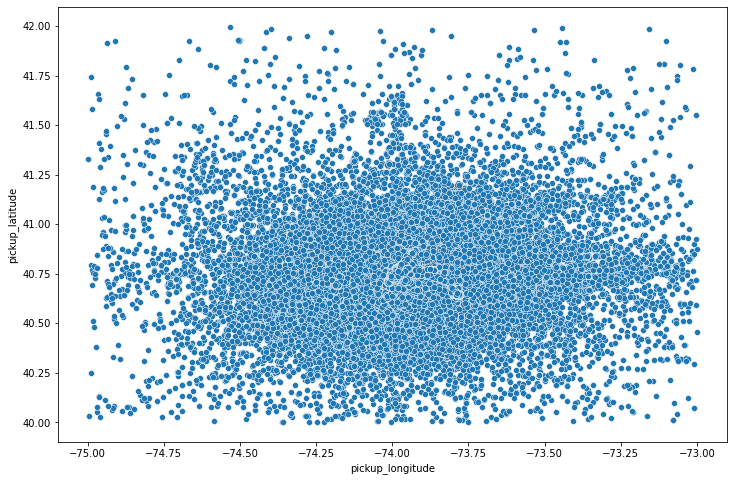

In [ ]:
plt.title("Scatter plot of locations after data cleaning:")
plt.figure(figsize=(12,8))
sns.scatterplot(x=train_df['pickup_longitude'], y=train_df['pickup_latitude'])

In [ ]:
train_df.describe()


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,5404935.000,5404935.000,5404935.000,5404935.000,5404935.000,5404935.000
mean,11.300,-73.975,40.751,-73.974,40.752,1.691
std,9.422,0.039,0.030,0.038,0.884,1.307
min,0.010,-74.995,40.032,-74.970,0.004,1.000
25%,6.000,-73.992,40.737,-73.992,40.736,1.000
50%,8.500,-73.982,40.753,-73.981,40.754,1.000
75%,12.500,-73.968,40.768,-73.965,40.768,2.000
max,110.000,-73.014,41.985,-73.004,487.167,6.000


## Now in the above details, there are no irrelevent entries

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5405973 entries, 23058087 to 4149172
Data columns (total 7 columns):
 #   Column             Dtype  
---  ------             -----  
 0   fare_amount        float32
 1   pickup_datetime    object 
 2   pickup_longitude   float32
 3   pickup_latitude    float32
 4   dropoff_longitude  float32
 5   dropoff_latitude   float64
 6   passenger_count    int8   
dtypes: float32(4), float64(1), int8(1), object(1)
memory usage: 211.4+ MB


# ***Feature Engineering***
* An important metric for the fare amount is the distance travelled.
* Since the earth is almost a sphere, we'll calculate the distances between two points using the Haversine formula and add it to our data as a column.
* After experimenting for a while, We found that the manhattan distance formula performs better than the haversine, so We'll be using this for now.

In [ ]:
def manhattan_dist(lat_p, long_p, lat_d, long_d):  
    distance = np.abs(lat_d - lat_p) + np.abs(long_d - long_p)
    
    return distance

***Let's extract the information from datetime object, as year, month, day and hour could all be important factors in predicting the fare amount***.

In [ ]:
def add_datetime_info(df, transform_datetime=False):
    if transform_datetime:
        df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], format="%Y-%m-%d %H:%M:%S UTC")
    
    df['hour'] = df['pickup_datetime'].dt.hour
    df['day'] = df['pickup_datetime'].dt.day
    df['month'] = df['pickup_datetime'].dt.month
    df['year'] = df['pickup_datetime'].dt.year
    df.drop('pickup_datetime', axis=1, inplace=True)

 ***The intuition for adding the distances to the airports comes from this some research papers***.


In [ ]:
def add_airport_info(df):
#     nyc = (40.7141667, -74.0063889)
#     jfk = (-73.7822222222, 40.6441666667)
#     ewr = (-74.175, 40.69)
#     lgr = (-73.87, 40.77)
    
    nyc = (-74.0063889, 40.7141667) # New York City
    jfk = (40.6441666667, -73.7822222222)#John F. Kennedy International Airport
    ewr = (40.69, -74.175)#Newark Liberty International Airport

    lgr = (40.77, -73.87)#LaGuardia Airport
    
    df['distance_to_center'] = manhattan_dist(nyc[0], nyc[1], df['pickup_latitude'], df['pickup_longitude'])
    df['pickup_distance_to_jfk'] = manhattan_dist(jfk[0], jfk[1], df['pickup_latitude'], df['pickup_longitude'])
    df['dropoff_distance_to_jfk'] = manhattan_dist(jfk[0], jfk[1], df['dropoff_latitude'], df['dropoff_longitude'])
    df['pickup_distance_to_ewr'] = manhattan_dist(ewr[0], ewr[1], df['pickup_latitude'], df['pickup_longitude'])
    df['dropoff_distance_to_ewr'] = manhattan_dist(ewr[0], ewr[1],df['dropoff_latitude'], df['dropoff_longitude'])
    df['pickup_distance_to_lgr'] = manhattan_dist(lgr[0], lgr[1], df['pickup_latitude'], df['pickup_longitude'])
    df['dropoff_distance_to_lgr'] = manhattan_dist(lgr[0], lgr[1], df['dropoff_latitude'], df['dropoff_longitude'])

    df['long_diff'] = df.dropoff_longitude - df.pickup_longitude
    df['lat_diff'] = df.dropoff_latitude - df.pickup_latitude
    

In [ ]:
def transform(df, transform_datetime):
    add_datetime_info(df, transform_datetime)
    add_airport_info(df)
    df['manhattan_dist'] = manhattan_dist(df['pickup_latitude'], df['pickup_longitude'], df['dropoff_latitude'], df['dropoff_longitude'])
    return df

 ***We also need to change the pickup_datetime column from being an object to a datetime object***.


In [ ]:
# train_df['pickup_datetime'] =  pd.to_datetime(train_df['pickup_datetime'], format="%Y-%m-%d %H:%M:%S UTC")
train_df = transform(train_df, transform_datetime=True)

In [ ]:
train_df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,distance_to_center,pickup_distance_to_jfk,dropoff_distance_to_jfk,pickup_distance_to_ewr,dropoff_distance_to_ewr,pickup_distance_to_lgr,dropoff_distance_to_lgr,long_diff,lat_diff,manhattan_dist
23058087,16.900,-73.980,40.742,-73.971,40.795,1,12,23,12,2010,229.443,0.296,0.340,0.247,0.309,0.138,0.127,0.009,0.053,0.062
19880255,4.100,-73.986,40.767,-73.983,40.762,1,8,20,5,2012,229.474,0.327,0.319,0.266,0.265,0.119,0.120,0.004,-0.005,0.009
13842597,8.000,-74.010,40.719,-73.994,40.739,1,4,12,11,2014,229.450,0.303,0.307,0.193,0.231,0.192,0.154,0.017,0.020,0.037
32416799,13.700,-73.992,40.716,-73.971,40.764,1,8,18,2,2010,229.428,0.281,0.309,0.208,0.278,0.177,0.107,0.021,0.048,0.069
29273414,6.900,-73.981,40.774,-73.977,40.758,1,8,13,1,2012,229.476,0.329,0.309,0.278,0.266,0.115,0.119,0.004,-0.016,0.020


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5405973 entries, 23058087 to 4149172
Data columns (total 20 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   fare_amount              float32
 1   pickup_longitude         float32
 2   pickup_latitude          float32
 3   dropoff_longitude        float32
 4   dropoff_latitude         float64
 5   passenger_count          int8   
 6   hour                     int64  
 7   day                      int64  
 8   month                    int64  
 9   year                     int64  
 10  distance_to_center       float64
 11  pickup_distance_to_jfk   float64
 12  dropoff_distance_to_jfk  float64
 13  pickup_distance_to_ewr   float64
 14  dropoff_distance_to_ewr  float64
 15  pickup_distance_to_lgr   float64
 16  dropoff_distance_to_lgr  float64
 17  long_diff                float32
 18  lat_diff                 float64
 19  manhattan_dist           float64
dtypes: float32(5), float64(10), int64(4), i

# ***Displaying unique values of hour,day,month,year of our data***

In [ ]:
sorted(train_df.year.unique())

[2009, 2010, 2011, 2012, 2013, 2014, 2015]

In [ ]:
sorted(train_df.day.unique())

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31]

In [ ]:
sorted(train_df.hour.unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

In [ ]:
train_df['year'].value_counts()

2012    862719
2011    848889
2013    848029
2009    844009
2010    816366
2014    808409
2015    377552
Name: year, dtype: int64

In [ ]:
train_df['hour'].value_counts()

19    337413
18    325482
20    319739
21    309754
22    300548
14    272628
17    268217
23    267184
12    266315
13    264058
15    260522
9     252483
11    251469
8     245425
10    243939
16    222995
0     214348
7     194427
1     158402
2     117487
6     110794
3      86875
4      62660
5      52809
Name: hour, dtype: int64

In [ ]:
train_df['month'].value_counts()

In [ ]:
train_df['day'].value_counts()

## ***DATA ENGINEERING TO ADD TEMPERATURE AS A NEW AND AN IMPORTANT FEATURE IN DATAFRAME***

In [ ]:
jan_l = 29.0
jan_h = 40.0
jan_temp = np.random.uniform(jan_l,jan_h,size = 31).round(2)

feb_l = 30.0
feb_h = 42.0
feb_temp = np.random.uniform(feb_l,feb_h,size = 31).round(2)

mar_l = 37.0
mar_h = 51.0
mar_temp = np.random.uniform(mar_l,mar_h,size = 31).round(2)

apr_l = 46.0
apr_h = 61.0
apr_temp = np.random.uniform(apr_l,apr_h,size = 31).round(2)

may_l = 56.0
may_h = 71.0
may_temp = np.random.uniform(may_l,may_h,size = 31).round(2)

jun_l = 65.0
jun_h = 79.0
jun_temp = np.random.uniform(jun_l,jun_h,size = 31).round(2)

jul_l = 71.0
jul_h = 84.0
jul_temp = np.random.uniform(jul_l,jul_h,size = 31).round(2)

aug_l = 69.0
aug_h = 82.0
aug_temp = np.random.uniform(aug_l,aug_h,size = 31).round(2)

sep_l = 62.0
sep_h = 75.0
sep_temp = np.random.uniform(sep_l,sep_h,size = 31).round(2)

oct_l = 52.0
oct_h = 65.0
oct_temp = np.random.uniform(oct_l,oct_h,size = 31).round(2)

nov_l = 42.0
nov_h = 54.0
nov_temp = np.random.uniform(nov_l,nov_h,size = 31).round(2)

dec_l = 34.0
dec_h = 45.0
dec_temp = np.random.uniform(dec_l,dec_h,size = 31).round(2)


In [ ]:
temp=[]
for row in train_df['month']:
    if row==1:
        temp.append(np.random.choice(jan_temp))
    elif row==2:
        temp.append(np.random.choice(feb_temp))
    elif row==3:
        temp.append(np.random.choice(mar_temp))
    elif row==4:
        temp.append(np.random.choice(apr_temp))
    elif row==5:
        temp.append(np.random.choice(may_temp)) 
    elif row==6:
        temp.append(np.random.choice(jun_temp))
    elif row==7:
        temp.append(np.random.choice(jul_temp))
    elif row==8:
        temp.append(np.random.choice(aug_temp))
    elif row==9:
        temp.append(np.random.choice(sep_temp)) 
    elif row==10:
        temp.append(np.random.choice(oct_temp))
    elif row==11:
        temp.append(np.random.choice(nov_temp))
    else:
        temp.append(np.random.choice(dec_temp))
        

In [ ]:
train_df['Temp']=temp

## ***Dataframe after data engineering***

In [ ]:
train_df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,...,pickup_distance_to_jfk,dropoff_distance_to_jfk,pickup_distance_to_ewr,dropoff_distance_to_ewr,pickup_distance_to_lgr,dropoff_distance_to_lgr,long_diff,lat_diff,manhattan_dist,Temp
23058087,16.900,-73.980,40.742,-73.971,40.795,1,12,23,12,2010,...,0.296,0.340,0.247,0.309,0.138,0.127,0.009,0.053,0.062,35.490
19880255,4.100,-73.986,40.767,-73.983,40.762,1,8,20,5,2012,...,0.327,0.319,0.266,0.265,0.119,0.120,0.004,-0.005,0.009,70.200
13842597,8.000,-74.010,40.719,-73.994,40.739,1,4,12,11,2014,...,0.303,0.307,0.193,0.231,0.192,0.154,0.017,0.020,0.037,49.190
32416799,13.700,-73.992,40.716,-73.971,40.764,1,8,18,2,2010,...,0.281,0.309,0.208,0.278,0.177,0.107,0.021,0.048,0.069,34.080
29273414,6.900,-73.981,40.774,-73.977,40.758,1,8,13,1,2012,...,0.329,0.309,0.278,0.266,0.115,0.119,0.004,-0.016,0.020,33.300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27530717,5.500,-74.005,40.729,-74.010,40.735,1,18,27,2,2009,...,0.307,0.318,0.209,0.210,0.176,0.175,-0.005,0.006,0.011,31.620
5768827,18.100,-73.967,40.765,-74.000,40.714,6,13,12,4,2012,...,0.305,0.289,0.283,0.199,0.102,0.186,-0.033,-0.050,0.084,58.240
19441558,25.700,-73.994,40.741,-73.923,40.867,1,3,1,4,2011,...,0.309,0.364,0.232,0.429,0.153,0.150,0.071,0.126,0.197,59.870
43679724,10.500,-73.981,40.764,-74.005,40.741,1,18,14,11,2012,...,0.319,0.319,0.268,0.221,0.117,0.164,-0.023,-0.023,0.047,52.400


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5405973 entries, 23058087 to 4149172
Data columns (total 21 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   fare_amount              float32
 1   pickup_longitude         float32
 2   pickup_latitude          float32
 3   dropoff_longitude        float32
 4   dropoff_latitude         float64
 5   passenger_count          int8   
 6   hour                     int64  
 7   day                      int64  
 8   month                    int64  
 9   year                     int64  
 10  distance_to_center       float64
 11  pickup_distance_to_jfk   float64
 12  dropoff_distance_to_jfk  float64
 13  pickup_distance_to_ewr   float64
 14  dropoff_distance_to_ewr  float64
 15  pickup_distance_to_lgr   float64
 16  dropoff_distance_to_lgr  float64
 17  long_diff                float32
 18  lat_diff                 float64
 19  manhattan_dist           float64
 20  Temp                     float64
dtypes

In [ ]:
train_df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,...,pickup_distance_to_jfk,dropoff_distance_to_jfk,pickup_distance_to_ewr,dropoff_distance_to_ewr,pickup_distance_to_lgr,dropoff_distance_to_lgr,long_diff,lat_diff,manhattan_dist,Temp
44745030,7.700,-73.978,40.763,-73.985,40.761,1,18,15,3,2010,...,0.314,0.319,0.271,0.260,0.114,0.125,-0.008,-0.003,0.010,45.240
25977334,23.000,-73.966,40.769,-74.007,40.705,2,19,12,6,2013,...,0.308,0.286,0.289,0.183,0.096,0.202,-0.042,-0.064,0.106,74.670
47222460,9.500,-73.995,40.740,-73.967,40.753,1,17,7,7,2013,...,0.309,0.294,0.231,0.272,0.154,0.113,0.028,0.013,0.041,76.670
4780369,13.000,-73.789,40.641,-73.755,40.667,1,17,25,5,2015,...,0.010,0.050,0.435,0.443,0.210,0.218,0.034,0.026,0.060,64.840
49506809,6.900,-73.980,40.786,-73.983,40.764,1,8,13,5,2012,...,0.340,0.320,0.291,0.266,0.126,0.119,-0.003,-0.022,0.025,64.840


## ***Final verification of null values of features in our data***:

In [ ]:
train_df.isna().sum()

fare_amount                0
pickup_longitude           0
pickup_latitude            0
dropoff_longitude          0
dropoff_latitude           0
passenger_count            0
hour                       0
day                        0
month                      0
year                       0
day_of_week                0
distance_to_center         0
pickup_distance_to_jfk     0
dropoff_distance_to_jfk    0
pickup_distance_to_ewr     0
dropoff_distance_to_ewr    0
pickup_distance_to_lgr     0
dropoff_distance_to_lgr    0
long_diff                  0
lat_diff                   0
manhattan_dist             0
Temp                       0
dtype: int64

#***Visualizations to see how the fare amount is changing with regards to different time periods.***


In [ ]:
def visualize_date_fare(df):

    date_objects = ['hour', 'day', 'month', 'year',]

    for idx, obj in enumerate(date_objects):
    #     print("IDX", idx)
    #     print("OBJ", obj)
        plt.figure(figsize=(10,6))
        sns.barplot(x=df[obj], y=df['fare_amount'], ci=None) # setting ci=None dramatically decreases the time for plotting
        print(plt.get_cmap())
        plt.title('Average Fare Amount by ' + obj)
        plt.ylabel('New Fare Amount')
        
        plt.show()

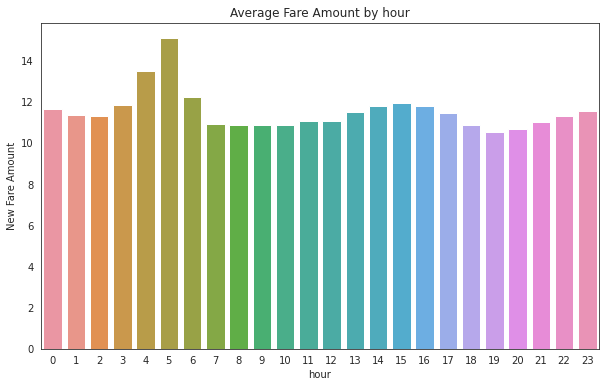

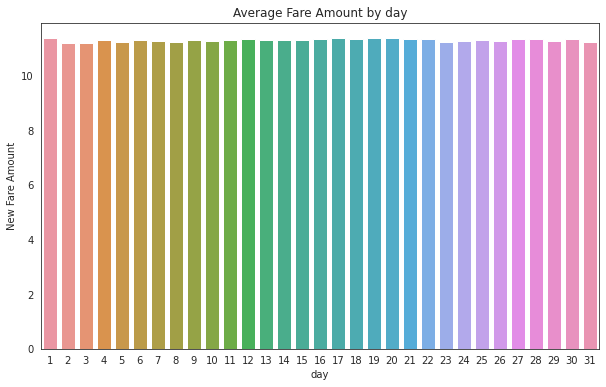

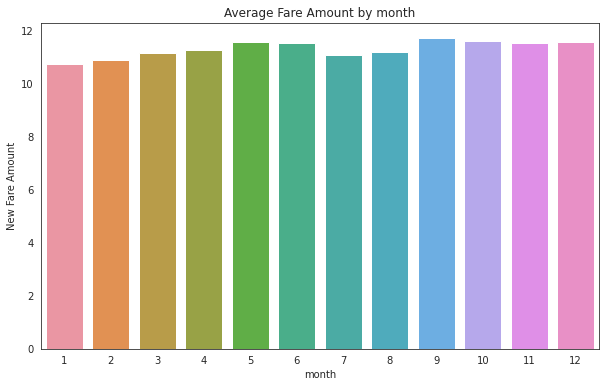

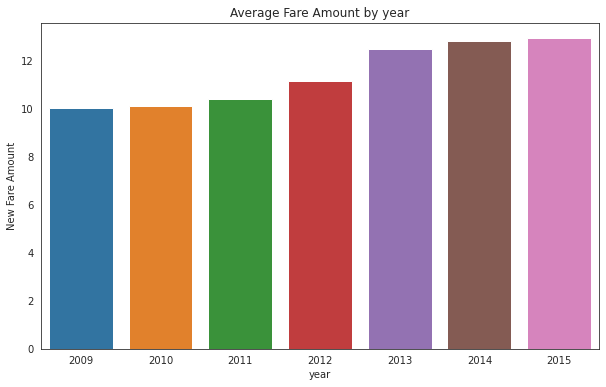

In [ ]:
visualize_date_fare(train_df)

* here is a steady trend of increasing fare amounts by the year. We can see the fare amount also changes noticeably by the hour.
  However, the fare amount doesn't seem to change that much from day to day.

#***Visualizations to see how the taxi ride count is changing with regards to different time periods.***

In [ ]:
def visualize_date_counts(df):
    #     date_objects = ['hour', 'day', 'weekday', 'month', 'year']
    date_objects = ['hour', 'day', 'month', 'year']
    # fig, axes = plt.subplots(1, 5)

    for obj in date_objects:
        plt.figure(figsize=(10,6))
        sns.countplot(x=df[obj])
        plt.ylabel('Count')
        plt.title('Taxi Rides Count by ' + obj)
        plt.show()

* Graphs of the amount of taxi rides by time periods.


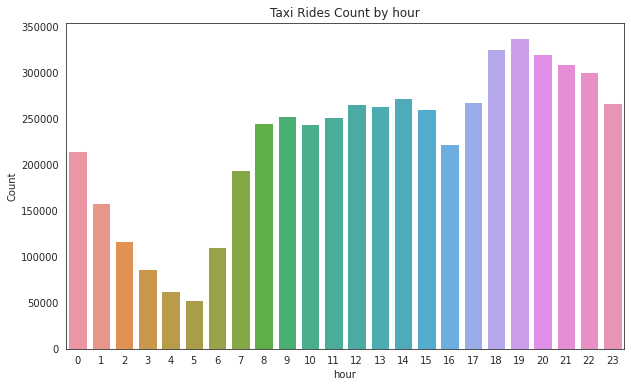

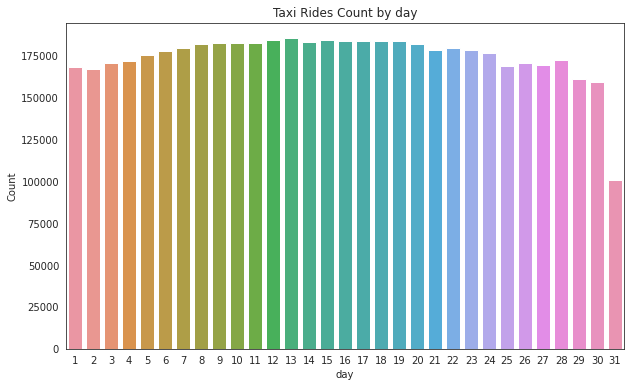

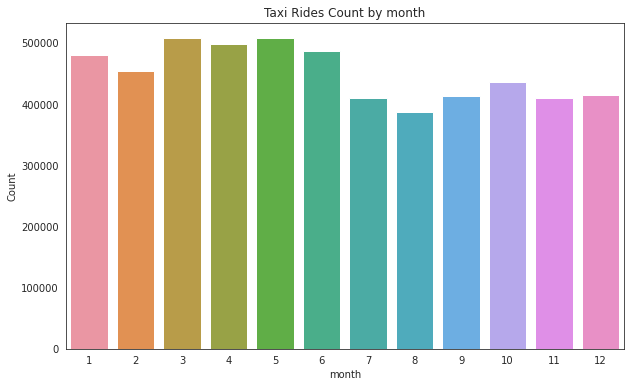

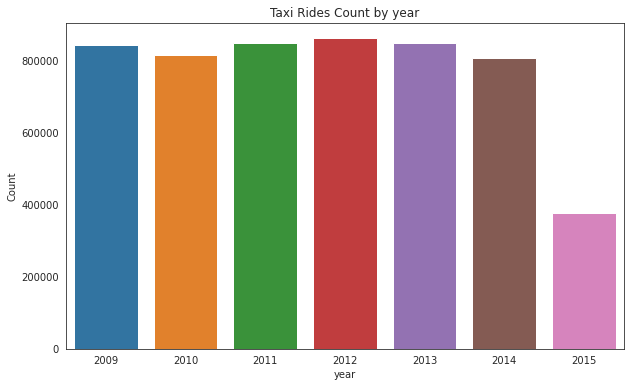

In [ ]:
visualize_date_counts(train_df)

# ***Training***



In [ ]:
X = train_df.drop(['fare_amount'], axis=1)
y = train_df['fare_amount']

# ***Train-Test Split***

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=2022, test_size=0.1)


In [ ]:
X_train.shape,X_val.shape,y_train.shape,y_val.shape


((4865375, 20), (540598, 20), (4865375,), (540598,))

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4865375 entries, 39299565 to 13658082
Data columns (total 20 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   pickup_longitude         float32
 1   pickup_latitude          float32
 2   dropoff_longitude        float32
 3   dropoff_latitude         float64
 4   passenger_count          int8   
 5   hour                     int64  
 6   day                      int64  
 7   month                    int64  
 8   year                     int64  
 9   distance_to_center       float64
 10  pickup_distance_to_jfk   float64
 11  dropoff_distance_to_jfk  float64
 12  pickup_distance_to_ewr   float64
 13  dropoff_distance_to_ewr  float64
 14  pickup_distance_to_lgr   float64
 15  dropoff_distance_to_lgr  float64
 16  long_diff                float32
 17  lat_diff                 float64
 18  manhattan_dist           float64
 19  Temp                     float64
dtypes: float32(4), float64(11), int64(4), 

# ***Different ML Algorithms tested for this dataset for comparison***

# ***Linear Regression***

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

print("Test R^2 Score: {:.5f}".format(model.score(X_val, y_val)))

Test R^2 Score: 0.64074


# ***Random Forest Regressor***

In [ ]:
# Make necessary imports
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Split data into training and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)

# Train the model
regr = RandomForestRegressor(n_estimators = 10, max_depth = 4, random_state = 101)
regr.fit(X_train, y_train.values.ravel())

RandomForestRegressor(max_depth=4, n_estimators=10, random_state=101)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Make prediction
predictions = regr.predict(X_val)


##***Calculating R2 score***

In [ ]:
# Import library for metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Mean absolute error (MAE)
mae = mean_absolute_error(y_val.values.ravel(), predictions)

# Mean squared error (MSE)
mse = mean_squared_error(y_val.values.ravel(), predictions)

# R-squared scores
r2 = r2_score(y_val.values.ravel(), predictions)

# Print metrics
print('Mean Absolute Error:', round(mae, 2))
print('Mean Squared Error:', round(mse, 2))
print('R-squared scores:', round(r2, 2))

Mean Absolute Error: 2.53
Mean Squared Error: 19.93
R-squared scores: 0.77


# ***CatBoost Regressor***

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from catboost import CatBoostRegressor
model2=CatBoostRegressor()
model2.fit(X_train, y_train)
print("Test R^2 Score: {:.5f}".format(model2.score(X_val, y_val)))


Learning rate set to 0.156583
0:	learn: 8.3263451	total: 220ms	remaining: 3m 40s
1:	learn: 7.4387482	total: 431ms	remaining: 3m 34s
2:	learn: 6.7256062	total: 642ms	remaining: 3m 33s
3:	learn: 6.1474588	total: 838ms	remaining: 3m 28s
4:	learn: 5.6879335	total: 1.04s	remaining: 3m 27s
5:	learn: 5.3274234	total: 1.25s	remaining: 3m 27s
6:	learn: 5.0250266	total: 1.44s	remaining: 3m 24s
7:	learn: 4.8054912	total: 1.63s	remaining: 3m 22s
8:	learn: 4.6264484	total: 1.81s	remaining: 3m 19s
9:	learn: 4.4867291	total: 2.05s	remaining: 3m 22s
10:	learn: 4.3693623	total: 2.23s	remaining: 3m 21s
11:	learn: 4.2853574	total: 2.44s	remaining: 3m 20s
12:	learn: 4.2156790	total: 2.63s	remaining: 3m 19s
13:	learn: 4.1635191	total: 2.81s	remaining: 3m 17s
14:	learn: 4.1211170	total: 3.02s	remaining: 3m 18s
15:	learn: 4.0743168	total: 3.2s	remaining: 3m 16s
16:	learn: 4.0387312	total: 3.43s	remaining: 3m 18s
17:	learn: 4.0124006	total: 3.63s	remaining: 3m 17s
18:	learn: 3.9874925	total: 3.82s	remaining: 

### ***Extreme Gradient Boosting (XGBoost)***
* Parameter tuning was taking too long, so We used simple parameters, played around for a while and these turned out to work pretty well.

In [ ]:
def XGBoost(X_train,X_test,y_train,y_test):
    dtrain = xgb.DMatrix(X_train,label=y_train)
    dtest = xgb.DMatrix(X_test,label=y_test)

    return xgb.train(params={'objective':'reg:linear','eval_metric':'rmse', 'max_depth':7, 'colsample_bytree':0.9, 'gamma':1}
                    ,dtrain=dtrain,num_boost_round=100, 
                    early_stopping_rounds=30,evals=[(dtest,'test')])

In [ ]:
y_train_pred = xgb_model.predict(xgb.DMatrix(X_train), ntree_limit = xgb_model.best_iteration)
y_val_pred = xgb_model.predict(xgb.DMatrix(X_val), ntree_limit = xgb_model.best_iteration)

In [ ]:
xgb_model = XGBoost(X_train, X_val, y_train, y_val)

[06:31:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:31:01] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
[0]	test-rmse:10.3951
Will train until test-rmse hasn't improved in 30 rounds.
[1]	test-rmse:7.79959
[2]	test-rmse:6.11214
[3]	test-rmse:5.06833
[4]	test-rmse:4.4493
[5]	test-rmse:4.09895
[6]	test-rmse:3.8872
[7]	test-rmse:3.76645
[8]	test-rmse:3.6961
[9]	test-rmse:3.64617
[10]	test-rmse:3.61815
[11]	test-rmse:3.59065
[12]	test-rmse:3.57142
[13]	test-rmse:3.55942
[14]	test-rmse:3.5479
[15]	test-rmse:3.53815
[16]	test-rmse:3.52646
[17]	test-rmse:3.51785
[18]	test-rmse:3.50539
[19]	test-rmse:3.50113
[20]	test-rmse:3.49563
[21]	test-rmse:3.48942
[22]	test-rmse:3.47707
[23]	test-rmse:3.46955
[24]	test-rmse:3.46341
[25]	test-rmse:3.46087
[26]	test-rmse:3.4

* As expected, the linear model performs the worst on both train and validation sets. The XGBoost outperforms the Random Forest model, however We have not done any parameter tuning on it so the actual results might be closer.

In [ ]:
print("Train set error: ", np.sqrt(mse(y_train, y_train_pred)))
print("Validation set error: ", np.sqrt(mse(y_val, y_val_pred)))

Train set error:  3.25114
Validation set error:  3.3354306


# ***Artificial Neural Network***

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, HuberRegressor, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
import numpy as np


from keras.layers import Input, Dense, Dropout
from keras.models import Model
import random
import scipy.stats
import os
import tensorflow as tf
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import RepeatedKFold
from numpy import arange
from sklearn.linear_model import ElasticNet

## ***ANN MODEL***

In [ ]:
    import tensorflow as tf
    preproc = StandardScaler()
    X_tr_f = preproc.fit_transform(X_train)


    X_va_f = preproc.transform(X_val)
    validation_data = (X_va_f, y_val)
    RANDOM_STATE=1
    np.random.seed(1)
    random.seed(1)
    tf.random.set_seed(1)
    activation = 'relu' 

    inputs = Input(shape=(X_train.shape[1]))
    regularizer = tf.keras.regularizers.L2(0.00005)
    initalizer = tf.keras.initializers.GlorotNormal(seed = RANDOM_STATE)
    x = Dense(1024, 
              
              activation=activation,kernel_initializer = initalizer,kernel_regularizer = regularizer
             )(inputs)
    x = Dense(512, 
              
              activation=activation,kernel_initializer = initalizer,kernel_regularizer = regularizer
             )(x)                  
    x = Dense(256, 
             
              activation=activation,kernel_initializer = initalizer,kernel_regularizer = regularizer
             )(x)
    
    x = Dense(128, 
              
              activation=activation,kernel_initializer = initalizer,kernel_regularizer = regularizer
             )(x)
   
    x = Dense(64, 
              
              activation=activation,kernel_initializer = initalizer,kernel_regularizer = regularizer
             )(x)
    x = Dense(32, 
              
              activation=activation,kernel_initializer = initalizer,kernel_regularizer = regularizer
             )(x)
    x = Dense(16, 
              
              activation=activation,kernel_initializer = initalizer,kernel_regularizer = regularizer
             )(x)             
    x = Dense(4, 
              
              activation=activation,kernel_initializer = initalizer,kernel_regularizer = regularizer
             )(x)         

    x = Dense(1,
              use_bias=True,
              activation='linear'
             )(x)
    model = Model(inputs, x)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-4),
                      
                      loss='mean_squared_error')

    
                            

## ***Fitting an ANN model of our data***

In [ ]:
history = model.fit(
    X_tr_f, y_train, 
    epochs=30, 
    batch_size=256,
    validation_split=0.2
)

Epoch 1/30
15205/15205 [==============================] - 62s 4ms/step - loss: 11.8583 - val_loss: 11.8646
Epoch 2/30
15205/15205 [==============================] - 62s 4ms/step - loss: 11.8044 - val_loss: 11.8793
Epoch 3/30
15205/15205 [==============================] - 61s 4ms/step - loss: 11.7811 - val_loss: 11.8441
Epoch 4/30
15205/15205 [==============================] - 62s 4ms/step - loss: 11.7018 - val_loss: 11.7372
Epoch 5/30
15205/15205 [==============================] - 62s 4ms/step - loss: 11.6703 - val_loss: 11.6773
Epoch 6/30
15205/15205 [==============================] - 61s 4ms/step - loss: 11.6299 - val_loss: 11.6461
Epoch 7/30
15205/15205 [==============================] - 62s 4ms/step - loss: 11.5943 - val_loss: 11.5289
Epoch 8/30
15205/15205 [==============================] - 61s 4ms/step - loss: 11.5598 - val_loss: 11.7987
Epoch 9/30
15205/15205 [==============================] - 62s 4ms/step - loss: 11.5464 - val_loss: 11.4875
Epoch 10/30
15205/15205 [============

**Here rmse after 30 epoches is square root of mse i.e. 11.40 is 3.37, so accuracy here for this dataset is better than Random Forest,Linear Regression, , but inferior than  Catboost and XgBoost. For more epoques, performances degraded in ANN model.**

# **For this data we can get minimum losses(rmse) for 100 rounds. lesser than Catboost for 500 iterations. Finally,it can be assumed that,  the rmse value R2 score can be as good as 0.94 for XGboost for 1000 iterations. We have run only 100 rounds ,as dataset is huge.**

# ***MODEL PERFORMANCE***

***1. LINEAR REGRESSION R2: score=0.64***

***2.RANDOM FOREST: R2 score=0.77***

***3.  CATBOOST: R2 score= 0.877***

***4.  XGBOOST: R2 score = above 0.94(assumed from loss(rmse) value)***

***5. ANN: R2 score= around 0.85(assumed from loss(rmse) value)***


### ***PICKLE FILE FOR BEST MODEL***

In [ ]:
import pickle

### ***SAVE THE MODEL***

In [ ]:
pickle.dump(xgb_model, open('model.pkl', 'wb'))

### ***LOAD THE MODEL***

In [ ]:
pickled_model = pickle.load(open('model.pkl', 'rb'))


[08:29:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


###*** PREDICTION FROM TEST DATA***

In [ ]:
test_df =  pd.read_csv('/content/test.csv')
# test_df['pickup_datetime'] = pd.to_datetime(test_df['pickup_datetime'], format="%Y-%m-%d %H:%M:%S UTC")
test_df = transform(test_df, transform_datetime=True)

In [ ]:
test_df

,key,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,distance_to_center,pickup_distance_to_jfk,dropoff_distance_to_jfk,pickup_distance_to_ewr,dropoff_distance_to_ewr,pickup_distance_to_lgr,dropoff_distance_to_lgr,long_diff,lat_diff,manhattan_dist
0,2015-01-27 13:08:24.0000002,-73.973,40.764,-73.981,40.744,1,13,27,1,2015,229.458,0.311,0.299,0.275,0.247,0.110,0.138,-0.008,-0.020,0.028
1,2015-01-27 13:08:24.0000003,-73.987,40.719,-73.999,40.739,1,13,27,1,2015,229.427,0.280,0.312,0.218,0.225,0.167,0.160,-0.012,0.020,0.032
2,2011-10-08 11:53:44.0000002,-73.983,40.751,-73.980,40.746,1,11,8,10,2011,229.454,0.307,0.299,0.254,0.251,0.131,0.134,0.003,-0.005,0.008
3,2012-12-01 21:12:12.0000002,-73.981,40.768,-73.990,40.752,1,21,1,12,2012,229.470,0.323,0.316,0.272,0.246,0.113,0.139,-0.009,-0.016,0.025
4,2012-12-01 21:12:12.0000003,-73.966,40.790,-73.989,40.744,1,21,1,12,2012,229.476,0.329,0.307,0.309,0.241,0.116,0.144,-0.023,-0.045,0.068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9909,2015-05-10 12:37:51.0000002,-73.968,40.797,-73.956,40.780,6,12,10,5,2015,229.486,0.339,0.310,0.314,0.310,0.125,0.096,0.012,-0.017,0.029
9910,2015-01-12 17:05:51.0000001,-73.946,40.804,-73.960,40.776,6,17,12,1,2015,229.470,0.323,0.310,0.343,0.301,0.109,0.097,-0.015,-0.027,0.042
9911,2015-04-19 20:44:15.0000001,-73.992,40.727,-73.790,40.647,6,20,19,4,2015,229.439,0.292,0.010,0.220,0.428,0.165,0.203,0.202,-0.080,0.281
9912,2015-01-31 01:05:19.0000005,-73.986,40.735,-73.939,40.802,6,1,31,1,2015,229.442,0.295,0.315,0.235,0.348,0.150,0.101,0.046,0.066,0.113


#***Balancing data engineering of test data with train data***

In [ ]:
temp1=[]
for row in test_df['month']:
    if row==1:
        temp1.append(np.random.choice(jan_temp))
    elif row==2:
        temp1.append(np.random.choice(feb_temp))
    elif row==3:
        temp1.append(np.random.choice(mar_temp))
    elif row==4:
        temp1.append(np.random.choice(apr_temp))
    elif row==5:
        temp1.append(np.random.choice(may_temp)) 
    elif row==6:
        temp1.append(np.random.choice(jun_temp))
    elif row==7:
        temp1.append(np.random.choice(jul_temp))
    elif row==8:
        temp1.append(np.random.choice(aug_temp))
    elif row==9:
        temp1.append(np.random.choice(sep_temp)) 
    elif row==10:
        temp1.append(np.random.choice(oct_temp))
    elif row==11:
        temp1.append(np.random.choice(nov_temp))
    else:
        temp1.append(np.random.choice(dec_temp))

In [ ]:
test_df['Temp']=temp1

In [ ]:
test_df

,key,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,...,pickup_distance_to_jfk,dropoff_distance_to_jfk,pickup_distance_to_ewr,dropoff_distance_to_ewr,pickup_distance_to_lgr,dropoff_distance_to_lgr,long_diff,lat_diff,manhattan_dist,Temp
0,2015-01-27 13:08:24.0000002,-73.973,40.764,-73.981,40.744,1,13,27,1,2015,...,0.311,0.299,0.275,0.247,0.110,0.138,-0.008,-0.020,0.028,39.590
1,2015-01-27 13:08:24.0000003,-73.987,40.719,-73.999,40.739,1,13,27,1,2015,...,0.280,0.312,0.218,0.225,0.167,0.160,-0.012,0.020,0.032,36.360
2,2011-10-08 11:53:44.0000002,-73.983,40.751,-73.980,40.746,1,11,8,10,2011,...,0.307,0.299,0.254,0.251,0.131,0.134,0.003,-0.005,0.008,62.890
3,2012-12-01 21:12:12.0000002,-73.981,40.768,-73.990,40.752,1,21,1,12,2012,...,0.323,0.316,0.272,0.246,0.113,0.139,-0.009,-0.016,0.025,42.030
4,2012-12-01 21:12:12.0000003,-73.966,40.790,-73.989,40.744,1,21,1,12,2012,...,0.329,0.307,0.309,0.241,0.116,0.144,-0.023,-0.045,0.068,42.910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9909,2015-05-10 12:37:51.0000002,-73.968,40.797,-73.956,40.780,6,12,10,5,2015,...,0.339,0.310,0.314,0.310,0.125,0.096,0.012,-0.017,0.029,58.560
9910,2015-01-12 17:05:51.0000001,-73.946,40.804,-73.960,40.776,6,17,12,1,2015,...,0.323,0.310,0.343,0.301,0.109,0.097,-0.015,-0.027,0.042,30.210
9911,2015-04-19 20:44:15.0000001,-73.992,40.727,-73.790,40.647,6,20,19,4,2015,...,0.292,0.010,0.220,0.428,0.165,0.203,0.202,-0.080,0.281,59.870
9912,2015-01-31 01:05:19.0000005,-73.986,40.735,-73.939,40.802,6,1,31,1,2015,...,0.295,0.315,0.235,0.348,0.150,0.101,0.046,0.066,0.113,31.680


## ***Feature Engineering of test data***

In [ ]:
test_key = test_df['key']
# x_pred = test_df.drop(columns=['key', 'passenger_count'])
x_pred = test_df.drop(columns=['key'])

# Predict from test set
#prediction_pr = xgb_model.predict(xgb.DMatrix(x_pred))

In [ ]:
# Predict from test set
prediction_pr = xgb_model.predict(xgb.DMatrix(x_pred))

In [ ]:
test_df.head()


,key,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,...,pickup_distance_to_jfk,dropoff_distance_to_jfk,pickup_distance_to_ewr,dropoff_distance_to_ewr,pickup_distance_to_lgr,dropoff_distance_to_lgr,long_diff,lat_diff,manhattan_dist,Temp
0,2015-01-27 13:08:24.0000002,-73.973,40.764,-73.981,40.744,1,13,27,1,2015,...,0.311,0.299,0.275,0.247,0.110,0.138,-0.008,-0.020,0.028,39.590
1,2015-01-27 13:08:24.0000003,-73.987,40.719,-73.999,40.739,1,13,27,1,2015,...,0.280,0.312,0.218,0.225,0.167,0.160,-0.012,0.020,0.032,36.360
2,2011-10-08 11:53:44.0000002,-73.983,40.751,-73.980,40.746,1,11,8,10,2011,...,0.307,0.299,0.254,0.251,0.131,0.134,0.003,-0.005,0.008,62.890
3,2012-12-01 21:12:12.0000002,-73.981,40.768,-73.990,40.752,1,21,1,12,2012,...,0.323,0.316,0.272,0.246,0.113,0.139,-0.009,-0.016,0.025,42.030
4,2012-12-01 21:12:12.0000003,-73.966,40.790,-73.989,40.744,1,21,1,12,2012,...,0.329,0.307,0.309,0.241,0.116,0.144,-0.023,-0.045,0.068,42.910


In [ ]:
test_df.shape

(9914, 21)

In [ ]:
train_df.head()


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,...,pickup_distance_to_jfk,dropoff_distance_to_jfk,pickup_distance_to_ewr,dropoff_distance_to_ewr,pickup_distance_to_lgr,dropoff_distance_to_lgr,long_diff,lat_diff,manhattan_dist,Temp
23058087,16.900,-73.980,40.742,-73.971,40.795,1,12,23,12,2010,...,0.296,0.340,0.247,0.309,0.138,0.127,0.009,0.053,0.062,35.490
19880255,4.100,-73.986,40.767,-73.983,40.762,1,8,20,5,2012,...,0.327,0.319,0.266,0.265,0.119,0.120,0.004,-0.005,0.009,70.200
13842597,8.000,-74.010,40.719,-73.994,40.739,1,4,12,11,2014,...,0.303,0.307,0.193,0.231,0.192,0.154,0.017,0.020,0.037,49.190
32416799,13.700,-73.992,40.716,-73.971,40.764,1,8,18,2,2010,...,0.281,0.309,0.208,0.278,0.177,0.107,0.021,0.048,0.069,34.080
29273414,6.900,-73.981,40.774,-73.977,40.758,1,8,13,1,2012,...,0.329,0.309,0.278,0.266,0.115,0.119,0.004,-0.016,0.020,33.300


## ***Correlation plot***

In [ ]:
# use the corr() function to generate the correlation matrix of the numeric variables
corr = train_df.corr()

# print the correlation matrix
corr


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,...,pickup_distance_to_jfk,dropoff_distance_to_jfk,pickup_distance_to_ewr,dropoff_distance_to_ewr,pickup_distance_to_lgr,dropoff_distance_to_lgr,long_diff,lat_diff,manhattan_dist,Temp
fare_amount,1.000,0.383,-0.196,0.285,-0.006,0.014,-0.017,0.002,0.025,0.118,...,-0.414,-0.017,0.253,0.011,0.013,0.005,-0.099,0.000,0.048,0.014
pickup_longitude,0.383,1.000,0.130,0.407,0.005,-0.001,0.018,0.001,0.007,0.001,...,-0.505,-0.004,0.868,0.021,-0.129,-0.000,-0.562,0.001,0.025,0.006
pickup_latitude,-0.196,0.130,1.000,0.166,0.018,-0.008,0.024,-0.002,-0.002,-0.018,...,0.649,0.016,0.493,0.020,-0.381,-0.006,0.029,-0.016,-0.009,-0.011
dropoff_longitude,0.285,0.407,0.166,1.000,0.009,-0.003,-0.042,0.001,0.005,-0.001,...,-0.073,-0.023,0.371,0.052,-0.007,-0.013,0.527,0.003,0.020,0.003
dropoff_latitude,-0.006,0.005,0.018,0.009,1.000,-0.000,0.000,0.000,-0.000,-0.001,...,0.010,0.898,0.011,0.898,-0.004,0.896,0.003,0.999,0.896,-0.000
passenger_count,0.014,-0.001,-0.008,-0.003,-0.000,1.000,0.016,0.003,0.005,0.004,...,-0.007,0.000,-0.004,0.000,0.004,0.001,-0.002,-0.000,0.001,0.001
hour,-0.017,0.018,0.024,-0.042,0.000,0.016,1.000,0.001,-0.005,0.000,...,0.002,0.002,0.028,-0.002,-0.025,0.000,-0.054,-0.001,-0.002,-0.007
day,0.002,0.001,-0.002,0.001,0.000,0.003,0.001,1.000,-0.016,-0.009,...,-0.002,0.000,-0.000,0.000,0.002,0.000,0.000,0.000,0.000,0.013
month,0.025,0.007,-0.002,0.005,-0.000,0.005,-0.005,-0.016,1.000,-0.117,...,-0.007,-0.001,0.004,-0.000,0.000,-0.000,-0.002,0.000,0.000,0.324
year,0.118,0.001,-0.018,-0.001,-0.001,0.004,0.000,-0.009,-0.117,1.000,...,-0.026,-0.001,-0.008,-0.001,-0.012,-0.001,-0.002,-0.000,0.001,-0.050


In [ ]:
len(x_pred)


9914

In [ ]:
prediction_1 = prediction_pr.round(2)


## ***Dataframe to generate our CSV file***

In [ ]:
prediction1 = pd.DataFrame({
        "key": test_key,
        "new_fare": prediction_1
})
prediction1.to_csv('prediction_price.csv',index=False)


## ***Our output CSV file***

In [ ]:
d=pd.read_csv('prediction_price.csv')


In [ ]:
d.shape

(9914, 2)

In [ ]:
d.head(60)

,key,new_fare
0,2015-01-27 13:08:24.0000002,9.100
1,2015-01-27 13:08:24.0000003,10.440
2,2011-10-08 11:53:44.0000002,5.080
3,2012-12-01 21:12:12.0000002,8.560
4,2012-12-01 21:12:12.0000003,15.080
5,2012-12-01 21:12:12.0000005,9.590
6,2011-10-06 12:10:20.0000001,5.340
7,2011-10-06 12:10:20.0000003,49.040
8,2011-10-06 12:10:20.0000002,10.550
9,2014-02-18 15:22:20.0000002,6.930


# ***Feature Importance of XGBoost***:
* This is a metric that simply sums up how many times each feature is split on.
* The command xgb.importance returns a graph of feature importance measured by an f score.



Plotting Feature Importance


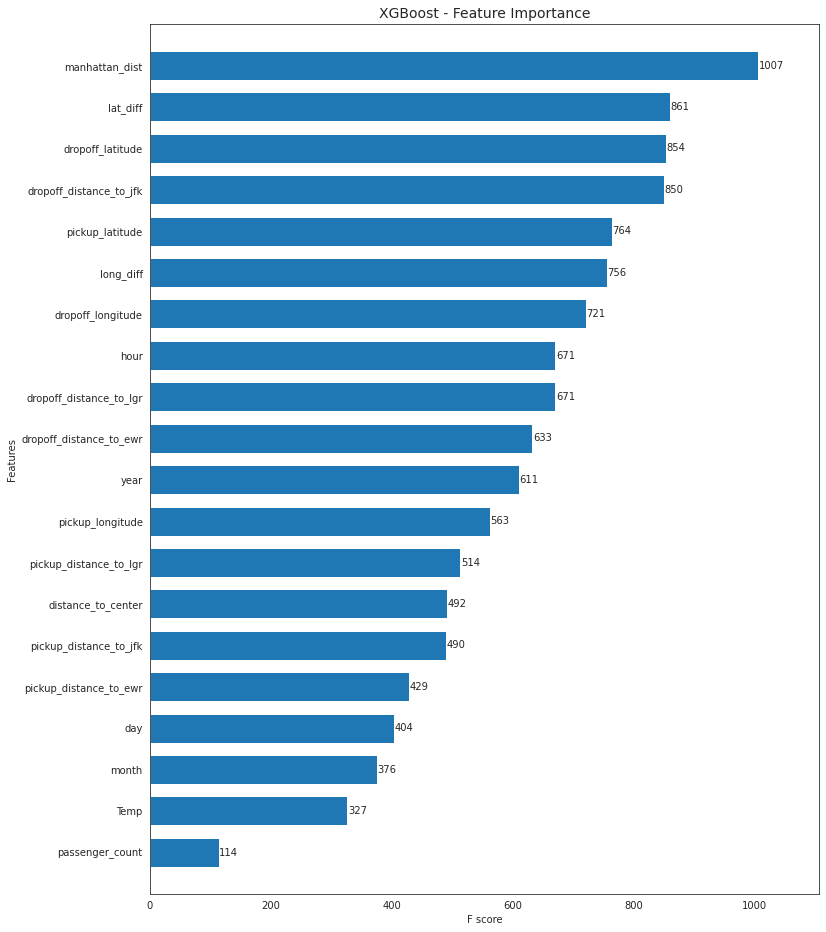

In [ ]:
print('Plotting Feature Importance')
fig, ax = plt.subplots(figsize=(12,16))
xgb.plot_importance(xgb_model, height=0.7, ax=ax)
ax.grid(False)
plt.title("XGBoost - Feature Importance", fontsize=14)
plt.show()

# ***Possible Improvements***:
* Tune hyperparameters using Cross Validation.
* Could take real life New York taxi fares in account, for example currently initial charge for taxis in NYC is 2.5$.
* Could take holidays and special occations in account, since the tax fares are higher on those days.